Sales Summary:
   product  total_qty  revenue
0   Apples         25    13.25
1  Bananas         12     3.95
2  Oranges         20    12.60


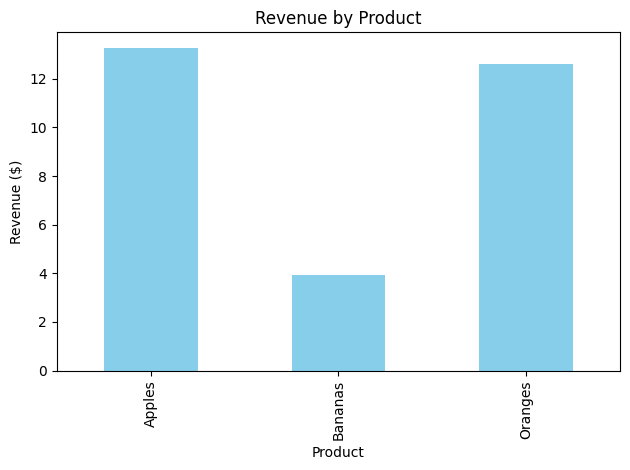

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Create database and sample data (only if not already created)
db_file = "sales_data.db"
create_data = not os.path.exists(db_file)

conn = sqlite3.connect(db_file)
cursor = conn.cursor()

if create_data:
    # Create table
    cursor.execute('''
        CREATE TABLE sales (
            id INTEGER PRIMARY KEY,
            product TEXT,
            quantity INTEGER,
            price REAL
        )
    ''')

    # Insert sample data
    sample_data = [
        ("Apples", 10, 0.50),
        ("Bananas", 5, 0.30),
        ("Oranges", 8, 0.60),
        ("Apples", 15, 0.55),
        ("Bananas", 7, 0.35),
        ("Oranges", 12, 0.65),
    ]

    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

# Step 2: Run SQL query
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        ROUND(SUM(quantity * price), 2) AS revenue
    FROM sales
    GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Print results
print("Sales Summary:")
print(df)

# Step 4: Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


Sales Summary by Product:
   product  total_qty  revenue
0   Apples         25    13.25
1  Bananas         12     3.95
2  Oranges         20    12.60

Total Sales Summary:
   total_quantity_sold  total_revenue
0                   57           29.8

Average Price per Product:
   product  avg_price
0   Apples       0.53
1  Bananas       0.32
2  Oranges       0.63


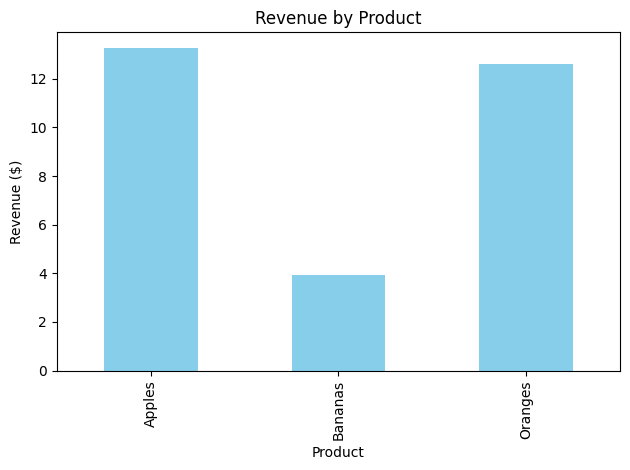